<a href="https://colab.research.google.com/github/drewm8080/Analyzing-COVID-19-Data/blob/main/Covidestim_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**User Input Here**

In [33]:
print('Welcome to the COVID-19 Covidestim Statistics')
print('')
print('Please tell me which state you would like to see. Type full name of state with the first letter capitalized. EX: Florida, Georgia etc.')
userinput = input('Please put state name here:')

Welcome to the COVID-19 Covidestim Statistics

Please tell me which state you would like to see. Type full name of state with the first letter capitalized. EX: Florida, Georgia etc.
Please put state name here:California


**Framework for Cases and Deaths from Covidestim**

In [34]:
# might need this cell if your data does not download directly from the URL
# !pip install fsspec
# !pip install pandas

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
# loading in the data
url = 'https://covidestim.s3.us-east-2.amazonaws.com/latest/state/estimates.csv'
df= pd.read_csv(url)

In [37]:
# setting datetime index 
df.date = pd.to_datetime(df.date)
df = df[df.date >= '2020-03-01']

In [38]:
# making sure the data starts after 03-01-2020
df = df[df.date >= '2020-03-01']

In [39]:
# slicing the data 
df = df.loc[:,['state','date','cases.fitted','deaths.fitted']]

In [40]:
# cleaning the data
df['Cases'] = df['cases.fitted']
df['Deaths'] = df['deaths.fitted']
df = df.drop(columns =['cases.fitted','deaths.fitted'])

In [41]:
# selecting the state
df = df[df.state == userinput]

In [42]:
# cleaning the data
df= df.reset_index(drop = True)

In [43]:
# calulating the cummulative cases
for i in range(1,len(df)):
  x = df.loc[i,'Cases'] + df.loc[i-1,'Cases']
  df.loc[i,'Cases'] = x

In [44]:
# calulating the cummulative deaths
for i in range(1,len(df)):
  x = df.loc[i,'Deaths'] + df.loc[i-1,'Deaths']
  df.loc[i,'Deaths'] = x

In [45]:
# creating day column for each date 
df['Day'] = df.groupby('state')['date'].rank(ascending=True)

In [46]:
df['Avg day of case'] = 0 # declaring new column
df['Avg day of death'] = 0

In [47]:
# setting the first day of each state to be the first date of cases 
df.loc[df.groupby('state')['date'].head(1).index, 'Avg day of case'] = df.loc[:,'Day']

In [48]:
# setting it so the avg day of death is the first day 
df = df[df.Deaths > 0]

In [49]:
# setting the first day as the first row in Avg day of death

df.loc[df.groupby('state')['date'].head(1).index, 'Avg day of death'] = df.loc[:,'Day']

In [50]:
# creating the CDF Column
df['cdf_cases'] = df['Cases']

In [51]:
# creating the cdf column
df['cdf_deaths'] = df['Deaths']

In [52]:
# creating the formula for the CDF column
df.loc[:,'cdf_cases':] = df.loc[:,'cdf_cases':].div(df.iloc[-1]['cdf_cases':])
df = df.reset_index()

In [53]:
# creating the formula for the CDF column
df['cdf_deaths'] = df.loc[:,'cdf_deaths':].div(df.iloc[-1]['cdf_deaths':])

In [54]:
# calulating Avgerage day of case
for i in range(1, len(df)):
  x = (((df.loc[i, 'Cases'] - df.loc[i-1, 'Cases']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of case'])) / (df.loc[i, 'Cases'])) + (df.loc[i-1, 'Avg day of case'])
  df.loc[i, 'Avg day of case'] = round(x, 2)

In [55]:
# calulating Avgerage day of death
for i in range(1, len(df)):
  x = (((df.loc[i, 'Deaths'] - df.loc[i-1, 'Deaths']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of death'])) / (df.loc[i, 'Deaths'])) + (df.loc[i-1, 'Avg day of death'])
  df.loc[i, 'Avg day of death'] = round(x, 2)

In [56]:
# subtracting the avg death day and avg case day
df['Avg Death Day - Avg Case Day'] = df['Avg day of death'] - df['Avg day of case'] 

In [57]:
# avg case day/ current day
df['Avg Day of Case/ Current Day'] = df['Avg day of case'] / df['Day']

In [58]:
# avg death day/ current day
df['Avg Day of Death/ Current Day'] = df['Avg day of death'] / df['Day']

In [59]:
# cleaning data
df = df.drop(columns = 'index')

In [60]:
df

,state,date,Cases,Deaths,Day,Avg day of case,Avg day of death,cdf_cases,cdf_deaths,Avg Death Day - Avg Case Day,Avg Day of Case/ Current Day,Avg Day of Death/ Current Day
0,California,2020-03-01,9.973948e-01,0.005298,1.0,1.00,1.00,2.75089e-07,9.16645e-08,0.00,1.000000,1.000000
1,California,2020-03-02,2.412339e+00,0.013205,2.0,1.59,1.60,6.65342e-07,2.28477e-07,0.01,0.795000,0.800000
2,California,2020-03-03,4.415417e+00,0.024971,3.0,2.23,2.26,1.21781e-06,4.32054e-07,0.03,0.743333,0.753333
3,California,2020-03-04,7.240305e+00,0.042265,4.0,2.92,2.97,1.99693e-06,7.31299e-07,0.05,0.730000,0.742500
4,California,2020-03-05,1.118590e+01,0.067502,5.0,3.65,3.73,3.08516e-06,1.16795e-06,0.08,0.730000,0.746000
...,...,...,...,...,...,...,...,...,...,...,...,...
382,California,2021-03-18,3.616938e+06,57173.060460,383.0,265.92,271.94,0.99758,0.989238,6.02,0.694308,0.710026
383,California,2021-03-19,3.619349e+06,57343.733555,384.0,266.00,272.27,0.998245,0.992191,6.27,0.692708,0.709036
384,California,2021-03-20,3.621607e+06,57504.310317,385.0,266.07,272.58,0.998868,0.99497,6.51,0.691091,0.708000
385,California,2021-03-21,3.623731e+06,57654.527221,386.0,266.14,272.88,0.999454,0.997569,6.74,0.689482,0.706943


**Statistics**

In [61]:
# framework for statistics
averagedayofcase = df['Avg day of case'].iloc[-1]
averagedayofdeath = df['Avg day of death'].iloc[-1]
differDeaths = df['Avg Death Day - Avg Case Day'].max()
differCases= -df['Avg Death Day - Avg Case Day'].min()

In [62]:
print('COVID-19 STATISTICS')
print('')
print('State = ', df.state.iloc[-1])
print('Average Day of Death and Average Day of Case as of',df['date'].iloc[-1])
print('Case =', averagedayofcase)
print('Death = ', averagedayofdeath)
print('Days When Average Dates of Death Differ By Largest Amounts')
print('Death Day – Case Day =', differDeaths)
print('Case Day - Death Day =',differCases)

COVID-19 STATISTICS

State =  California
Average Day of Death and Average Day of Case as of 2021-03-22 00:00:00
Case = 266.21
Death =  273.16
Days When Average Dates of Death Differ By Largest Amounts
Death Day – Case Day = 6.9500000000000455
Case Day - Death Day = 40.920000000000016


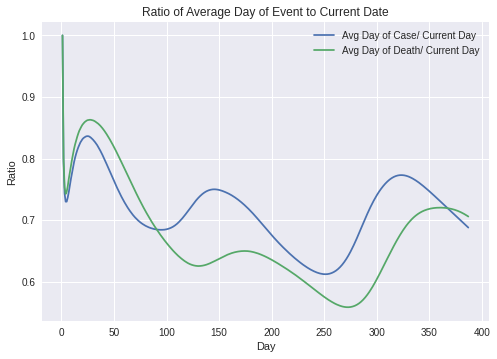

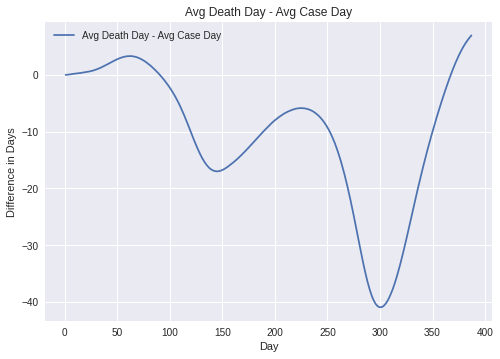

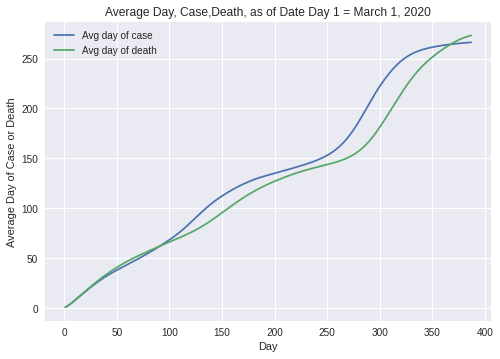

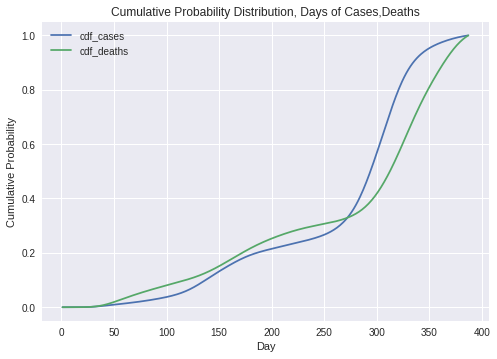

In [63]:
# ratio avg Day of Event/current Date Graph
df.plot(x= 'Day',y = ['Avg Day of Case/ Current Day','Avg Day of Death/ Current Day'],title = 'Ratio of Average Day of Event to Current Date', ylabel = 'Ratio')
# avg hospitalization day - avg case day
df.plot(x = 'Day', y=['Avg Death Day - Avg Case Day'],title = 'Avg Death Day - Avg Case Day',ylabel = 'Difference in Days')
# avg Day of Case/Death/Hospitalization
df.plot(x = 'Day', y= ['Avg day of case','Avg day of death'],title = 'Average Day, Case,Death, as of Date Day 1 = March 1, 2020', ylabel = 'Average Day of Case or Death')
# CDF
df.plot( x= 'Day', y= ['cdf_cases','cdf_deaths'],title = 'Cumulative Probability Distribution, Days of Cases,Deaths', ylabel = 'Cumulative Probability')

plt.style.use('seaborn')